In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [28]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [29]:
def read_csv(filename):
  data = pd.read_csv(filename)
  return data

In [30]:
if __name__ == '__main__':
  data = pd.read_csv("Iris.csv")
  print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

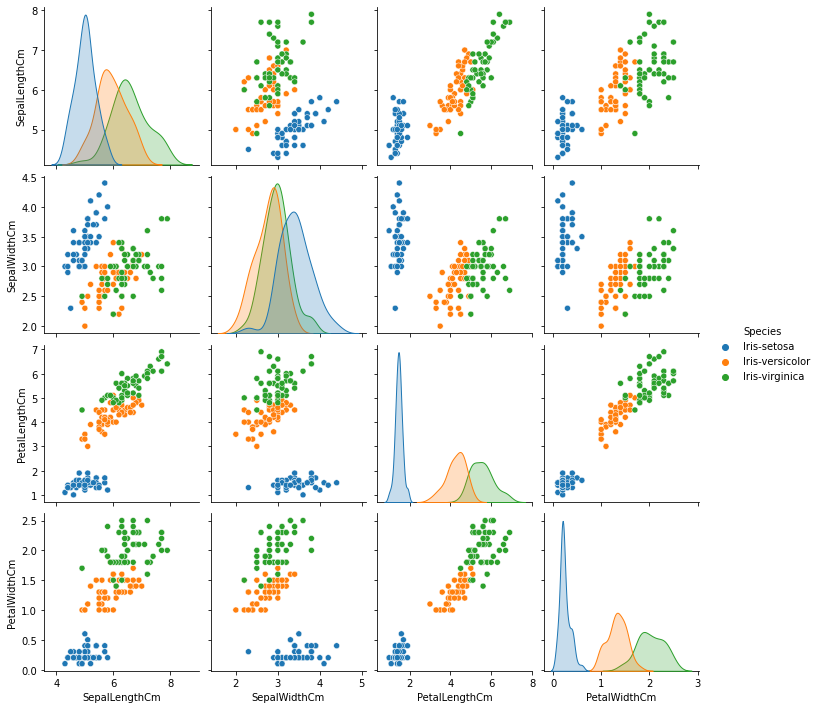

In [ ]:
sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue = 'Species')

нормализация

In [31]:
columnsData = data.columns

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [33]:
iris_type = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [34]:
data.Species = data.Species.replace(to_replace=iris_type)

In [35]:
data_normal = min_max_scaler.fit_transform(data)

In [36]:
data_normal = pd.DataFrame(data_normal, columns=columnsData)
data_normal.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,0.0
1,0.006711,0.166667,0.416667,0.067797,0.041667,0.0
2,0.013423,0.111111,0.500000,0.050847,0.041667,0.0
3,0.020134,0.083333,0.458333,0.084746,0.041667,0.0
4,0.026846,0.194444,0.666667,0.067797,0.041667,0.0


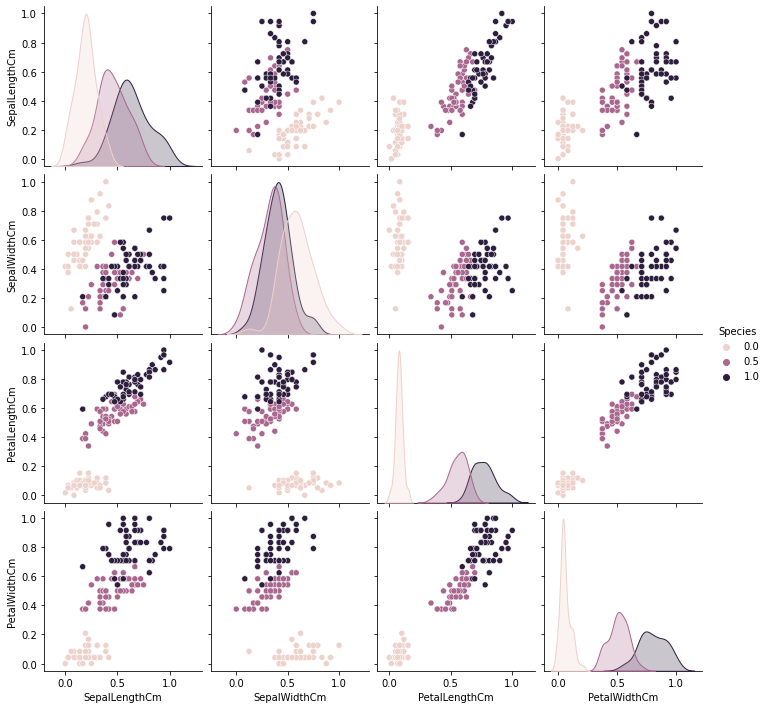

In [14]:
sns.pairplot(data_normal[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue = 'Species')

In [39]:
# split data 
def train_test_split(data):
  N = len(data)
  train_count = int(round(len(data) * 0.75))
  test_count = N - train_count;

  random_iris = data.sample(frac=1).reset_index(drop=True)
  target = random_iris['Species'];
  random_iris.drop(['Species'], axis=1)

  train = random_iris.head(train_count)
  train_target = target[:train_count]
  test = random_iris.tail(test_count)
  test_target = target[train_count:]

  return train, test, train_target, test_target

In [40]:
x = data.iloc[:, :-1] # все параметры
y = data.iloc[:, -1] # признак который хотим определить

x_train, x_test, y_train, y_test= train_test_split(data)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


x_n = data_normal.iloc[:, :-1] # все параметры
y_n = data_normal.iloc[:, -1] # признак который хотим определить

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(data_normal)
x_train_n = np.asarray(x_train_n)
y_train_n = np.asarray(y_train_n)

x_test_n = np.asarray(x_test_n)
y_test_n = np.asarray(y_test_n)

In [41]:
from collections import Counter
def get_distances(x_train, x_test_point):
  distances= []
  for point in x_train:
      current_distance= 0
      for i in range(len(point)):
          current_distance += (point[i] - x_test_point[i]) **2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance)
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

def nearest_neighbors(distance_point, K):
  df_nearest= distance_point.sort_values(by=['dist'], axis=0)

  return df_nearest[:K]

def voting(df_nearest, y_train):
  counter_vote= Counter(y_train[df_nearest.index])

  y_pred= counter_vote.most_common()[0][0] 

  return y_pred

In [42]:
result=[]
K = int(round(np.sqrt(x_train.shape[0])))
for x_test_point in x_test:
  distances = get_distances(x_train, x_test_point)
  df_nearest_point= nearest_neighbors(distances, K)
  possible_y = voting(df_nearest_point, y_train)
  result.append(possible_y)

print(result)
print(y_test)

[2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2]
[2 1 1 1 1 0 2 2 2 0 0 0 2 1 0 2 2 1 1 2 1 0 0 2 1 0 1 2 2 1 2 0 0 1 2 0 1
 2]


In [43]:
result=[]
K = int(round(np.sqrt(x_train_n.shape[0])))
for x_test_point in x_test_n:
  distances = get_distances(x_train_n, x_test_point)
  df_nearest_point= nearest_neighbors(distances, K)
  possible_y = voting(df_nearest_point, y_train_n)
  result.append(possible_y)

print(result)
print(y_test_n)

[0.5, 0.5, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 1.0, 0.0, 0.5, 0.0, 0.5, 0.5, 1.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.5 0.5 0.  0.  0.5 0.  0.5 1.  0.  0.  0.  0.  0.5 0.5 0.5 1.  0.  0.5
 0.  0.5 0.5 1.  0.  0.  1.  0.5 0.  0.  1.  1.  0.  1.  0.5 1.  0.  0.
 0.  0. ]
